In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import set_option

In [2]:
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(precision=2)

In [3]:
data = pd.read_csv("survey_encoded.csv")

In [4]:
data.describe()

,Age,Height,Weight,Gender,Educational Level,Economic Status,Dependant,Is_Employed,Is_Medically_Insured,Visit_Gym,...,Hospitalized in a year,Regular physician consultation,Negative lifestyle,Skipping Diet,Food-type,WFH due to COVID-19,Sedentary lifestyle due to COVID-19,Unhealthy food habit due to COVID-19,Addiction due to COVID,Depression
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,...,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,49.353707,170.940817,69.708942,0.620260,3.046406,1.434069,2.099038,4.161290,0.831919,0.203735,...,0.220713,0.398415,0.163554,1.292586,0.256367,1.024335,0.331070,0.156763,0.010187,0.395020
std,21.304617,10.095516,13.316740,0.485459,1.474240,1.353254,1.086223,2.753052,0.374044,0.402888,...,0.414845,0.489710,0.369975,0.470977,0.436750,0.979967,0.470731,0.363680,0.100443,0.488993
min,18.000000,121.920000,38.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,165.100000,59.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,170.180000,67.000000,1.000000,2.000000,1.000000,2.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,177.800000,80.000000,1.000000,5.000000,1.000000,3.000000,7.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,89.000000,210.820000,109.000000,1.000000,5.000000,5.000000,5.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = data.corr()

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Age,Height,Weight,Gender,Educational Level,Economic Status,Dependant,Is_Employed,Is_Medically_Insured,Visit_Gym,Duration of daily exercise,Duration of daily walking,Smoking Habit,Habit of Snus,Habit of Paan-Masala,Habit of Alcohol,The habit of Energy Drinks or Sweet Beverages,Mobile Application for Activity Tracking,Mobile Application for Diet Tracking,Social Participation Type,Social Participation duration,The habit of Vegetables,Habit of Fruits,Habit of Junk Fried Foods,Habit of Sweets,Habit of Red Meat,Habit of Taking BBQ,Habit of Taking discritionary foods,Week_Days_sleep_time_avg,Weekends_sleep_time_avg,Existing health problems,Hospitalized in a year,Regular physician consultation,Negative lifestyle,Skipping Diet,Food-type,WFH due to COVID-19,Sedentary lifestyle due to COVID-19,Unhealthy food habit due to COVID-19,Addiction due to COVID,Depression
Age,1.00,-0.36,-0.52,-0.24,0.08,0.05,0.21,0.39,0.45,-0.42,0.17,-0.36,-0.12,-0.02,0.39,-0.27,-0.06,-0.02,0.12,-0.10,0.17,-0.13,-0.24,0.04,0.15,0.11,-0.09,-0.32,0.19,-0.02,-0.22,0.20,0.17,-0.09,-0.01,-0.02,-0.26,-0.04,-0.01,-0.08,-0.06
Height,-0.36,1.00,0.82,0.48,-0.04,-0.15,-0.24,-0.19,-0.13,0.39,-0.26,-0.12,0.04,0.02,-0.25,0.11,0.00,-0.01,0.02,0.08,-0.21,-0.08,-0.02,-0.07,-0.14,-0.01,0.09,0.19,0.11,-0.03,0.05,-0.03,-0.02,-0.09,-0.09,0.06,0.08,-0.09,0.03,-0.08,-0.11
Weight,-0.52,0.82,1.00,0.48,-0.01,-0.10,-0.28,-0.26,-0.23,0.43,-0.21,0.06,0.04,0.01,-0.33,0.15,0.03,-0.01,-0.01,0.10,-0.24,-0.04,0.03,-0.07,-0.17,-0.04,0.10,0.26,0.04,-0.04,0.12,-0.06,-0.02,-0.03,-0.09,0.07,0.13,-0.06,0.04,0.00,-0.07
Gender,-0.24,0.48,0.48,1.00,-0.02,-0.08,-0.14,-0.11,-0.08,0.36,-0.16,-0.02,0.11,0.10,-0.31,0.19,0.09,-0.16,-0.21,0.14,-0.23,-0.02,0.04,-0.01,-0.08,-0.02,0.12,0.30,0.03,-0.02,0.07,0.31,0.25,-0.04,-0.20,-0.05,0.28,-0.07,0.02,-0.00,-0.10
Educational Level,0.08,-0.04,-0.01,-0.02,1.00,0.00,-0.04,-0.04,0.10,0.04,-0.02,-0.07,0.02,0.00,0.08,0.08,-0.05,-0.01,0.07,-0.05,0.00,-0.02,-0.08,0.01,0.01,0.05,0.04,-0.09,0.05,0.04,-0.00,0.02,-0.00,-0.05,-0.01,0.04,-0.05,-0.03,0.00,-0.01,-0.06
Economic Status,0.05,-0.15,-0.10,-0.08,0.00,1.00,0.02,0.01,0.02,-0.09,0.12,0.19,-0.03,-0.01,0.03,-0.01,-0.01,0.03,-0.02,-0.04,-0.00,0.13,0.03,0.03,0.03,0.00,-0.01,0.02,-0.13,0.03,0.01,-0.02,-0.02,0.06,0.09,0.03,-0.02,0.03,-0.00,0.02,0.01
Dependant,0.21,-0.24,-0.28,-0.14,-0.04,0.02,1.00,0.11,0.04,-0.22,0.15,-0.00,-0.05,-0.02,0.11,-0.07,0.04,-0.05,-0.04,-0.05,0.10,0.04,0.05,0.05,0.09,0.01,-0.00,-0.03,-0.01,-0.00,-0.03,0.05,-0.00,0.10,0.04,-0.03,-0.03,0.03,-0.05,0.03,0.06
Is_Employed,0.39,-0.19,-0.26,-0.11,-0.04,0.01,0.11,1.00,0.09,-0.14,0.23,0.07,-0.08,-0.05,0.11,-0.16,-0.03,0.09,0.10,-0.06,0.15,0.03,-0.02,0.08,0.08,0.03,-0.06,-0.09,-0.05,0.08,-0.03,0.12,0.12,0.06,0.04,-0.00,-0.15,0.05,0.05,-0.03,0.06
Is_Medically_Insured,0.45,-0.13,-0.23,-0.08,0.10,0.02,0.04,0.09,1.00,-0.05,-0.11,-0.21,-0.08,-0.00,0.25,-0.08,-0.06,0.18,0.28,-0.12,0.18,-0.10,-0.29,0.08,-0.01,0.11,-0.04,-0.25,0.11,0.06,-0.16,0.20,0.20,-0.12,-0.07,0.04,-0.07,-0.13,0.06,-0.11,-0.10
Visit_Gym,-0.42,0.39,0.43,0.36,0.04,-0.09,-0.22,-0.14,-0.05,1.00,-0.43,0.08,0.24,-0.03,-0.14,0.29,-0.08,0.21,0.17,-0.02,-0.04,-0.06,-0.11,-0.06,-0.08,-0.03,-0.07,0.09,0.01,0.06,0.06,0.07,0.08,-0.11,-0.13,0.14,0.09,-0.15,0.01,0.00,-0.04


<AxesSubplot: >

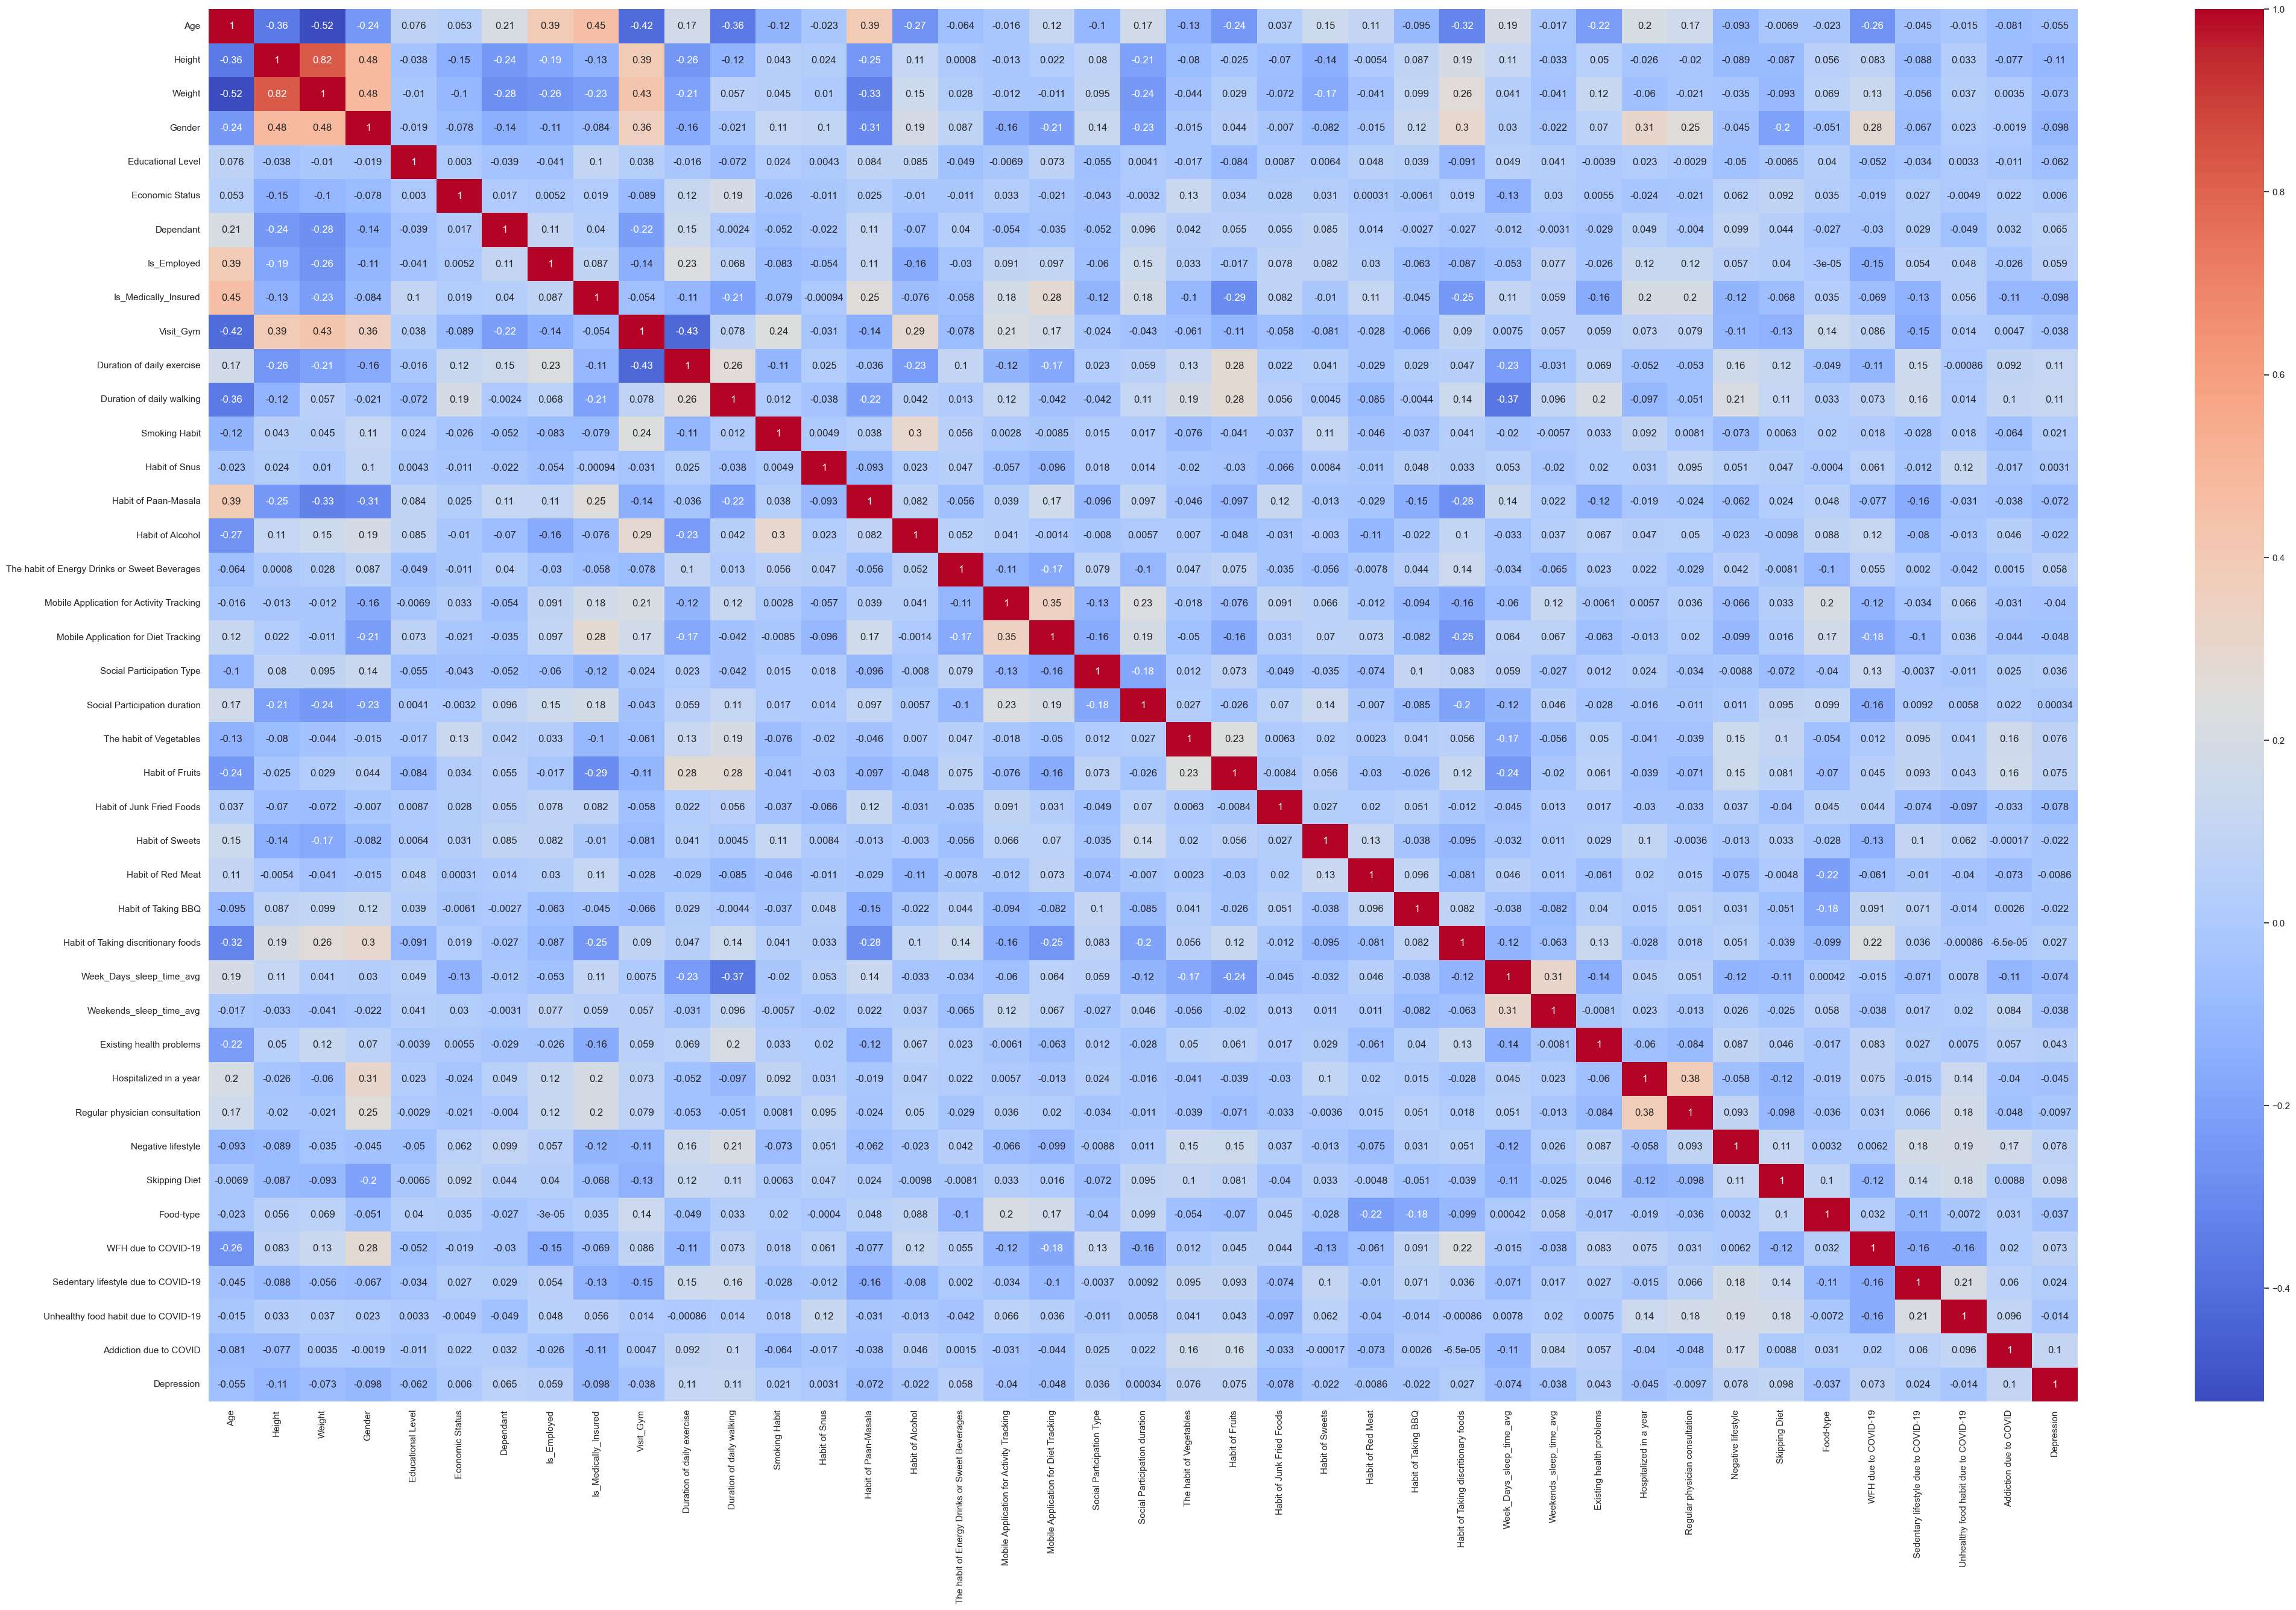

In [6]:
sns.set(rc = {'figure.figsize':(50,30)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [7]:
from scipy.stats import shapiro

#If your p value is less than 0.05, which it is, then you reject the null hypothesis and conclude that your data is nonormal
for (columnName, columnData) in data.iteritems():
   print('Colunm Name : ', columnName)
   print('Column distribution : ', shapiro(columnData.values))

Colunm Name :  Age
Column distribution :  ShapiroResult(statistic=0.9265553951263428, pvalue=1.4328516748365144e-28)
Colunm Name :  Height
Column distribution :  ShapiroResult(statistic=0.977510392665863, pvalue=4.905950773630271e-16)
Colunm Name :  Weight
Column distribution :  ShapiroResult(statistic=0.962921679019928, pvalue=7.346132051153052e-21)
Colunm Name :  Gender
Column distribution :  ShapiroResult(statistic=0.6152456998825073, pvalue=0.0)
Colunm Name :  Educational Level
Column distribution :  ShapiroResult(statistic=0.794832170009613, pvalue=1.3802789873599448e-42)
Colunm Name :  Economic Status
Column distribution :  ShapiroResult(statistic=0.6222234964370728, pvalue=0.0)
Colunm Name :  Dependant
Column distribution :  ShapiroResult(statistic=0.8406543135643005, pvalue=7.233278465090414e-39)
Colunm Name :  Is_Employed
Column distribution :  ShapiroResult(statistic=0.8903772830963135, pvalue=1.0937540552504558e-33)
Colunm Name :  Is_Medically_Insured
Column distribution :  

In [8]:
shapiro(data)

ShapiroResult(statistic=0.3103329539299011, pvalue=0.0)

In [9]:
def remove_missing(data):
    print (data.isnull().any())
    missing_values = ["n/a", "na", "--","?", " ","NA"]
    data = data.replace(missing_values, np.nan)
    feat_miss = data.columns[data.isnull().any()]
    if feat_miss.size == 0:
        print ("Data is clean")
    else:
        print ("Missing data shape before:", feat_miss.shape)
        imputer = SimpleImputer(copy=True, fill_value=None, missing_values=np.nan, strategy='calculate_iris', verbose=0)
        data[feat_miss] = imputer.fit_transform(data[feat_miss])
        feat_miss = data.columns[data.isnull().any()]
        print ("Missing data shape after:", feat_miss.shape)
    return data

In [10]:
data = remove_missing(data)

Age                                              False
Height                                           False
Weight                                           False
Gender                                           False
Educational Level                                False
Economic Status                                  False
Dependant                                        False
Is_Employed                                      False
Is_Medically_Insured                             False
Visit_Gym                                        False
Duration of daily exercise                       False
Duration of daily walking                        False
Smoking Habit                                    False
Habit of Snus                                    False
Habit of Paan-Masala                             False
Habit of Alcohol                                 False
The habit of Energy Drinks or Sweet Beverages    False
Mobile Application for Activity Tracking         False
Mobile App

In [11]:
def find_feature_reduced_matrix(correlation_matrix):
    corr_matrix = correlation_matrix.abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] >= 0.85)]
    # Drop features 
    #df.drop(to_drop, axis=1, inplace=True)
    return to_drop

In [12]:
corr_sort = find_feature_reduced_matrix(data.corr())
print ("Strong dependency,", corr_sort)

Strong dependency, []


In [13]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [14]:
print("Removing Correlated Features")
# Pass DataFrame and Threshold value 
data = remove_collinear_features(data, 0.85)

Removing Correlated Features
Removed Columns set()


In [15]:
def check_feature_Gender(df):
    male =len(df[df['Gender'] == 1])
    female = len(df[df['Gender']== 0])
    
    male_ = (male)/(male + female)
    female_ = (female)/(male + female)
    print(male_, female_)

    plt.figure(figsize=(6,4))

    # Data to plot
    labels = 'Male','Female'
    sizes = [male,female]
    colors = ['skyblue', 'yellowgreen']
    explode = (0, 0)  # explode 1st slice
 
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90) 
    plt.axis('equal')
    plt.show()
    
    # Data to plot
    plt.figure(figsize=(6,4))
    labels = 'Female','Male'
    sizes = [len(df[df['Gender'] == 0]),len(df[df['Gender'] == 1])]
    colors = ['skyblue', 'yellowgreen']
    explode = (0, 0)  # explode 1st slice
 
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180) 
    plt.axis('equal')
    plt.show()
    
    #Bar
    plt.figure(figsize=(6,4))
    labels = 'Female','Male'
    sizes = [len(df[df['Gender'] == 0]),len(df[df['Gender'] == 1])]
    plt.bar(labels,sizes)
    plt.show()

0.6202603282399547 0.37973967176004525


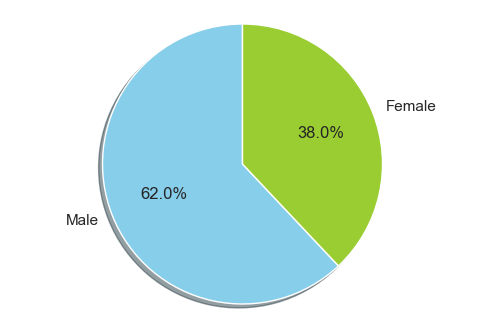

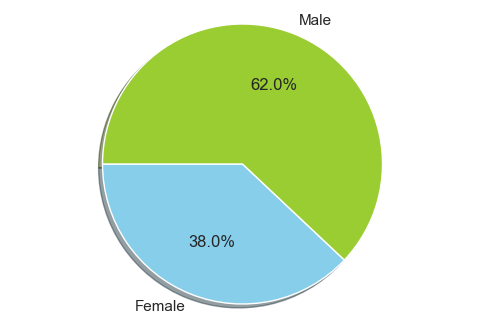

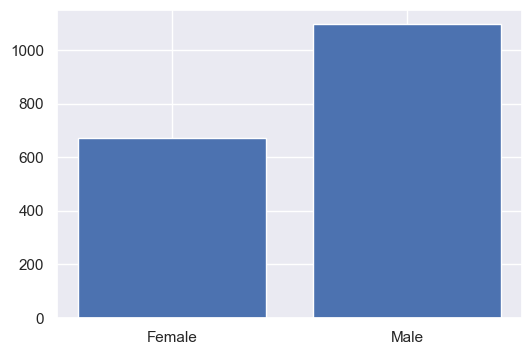

In [16]:
check_feature_Gender(data)

<AxesSubplot: ylabel='Density'>

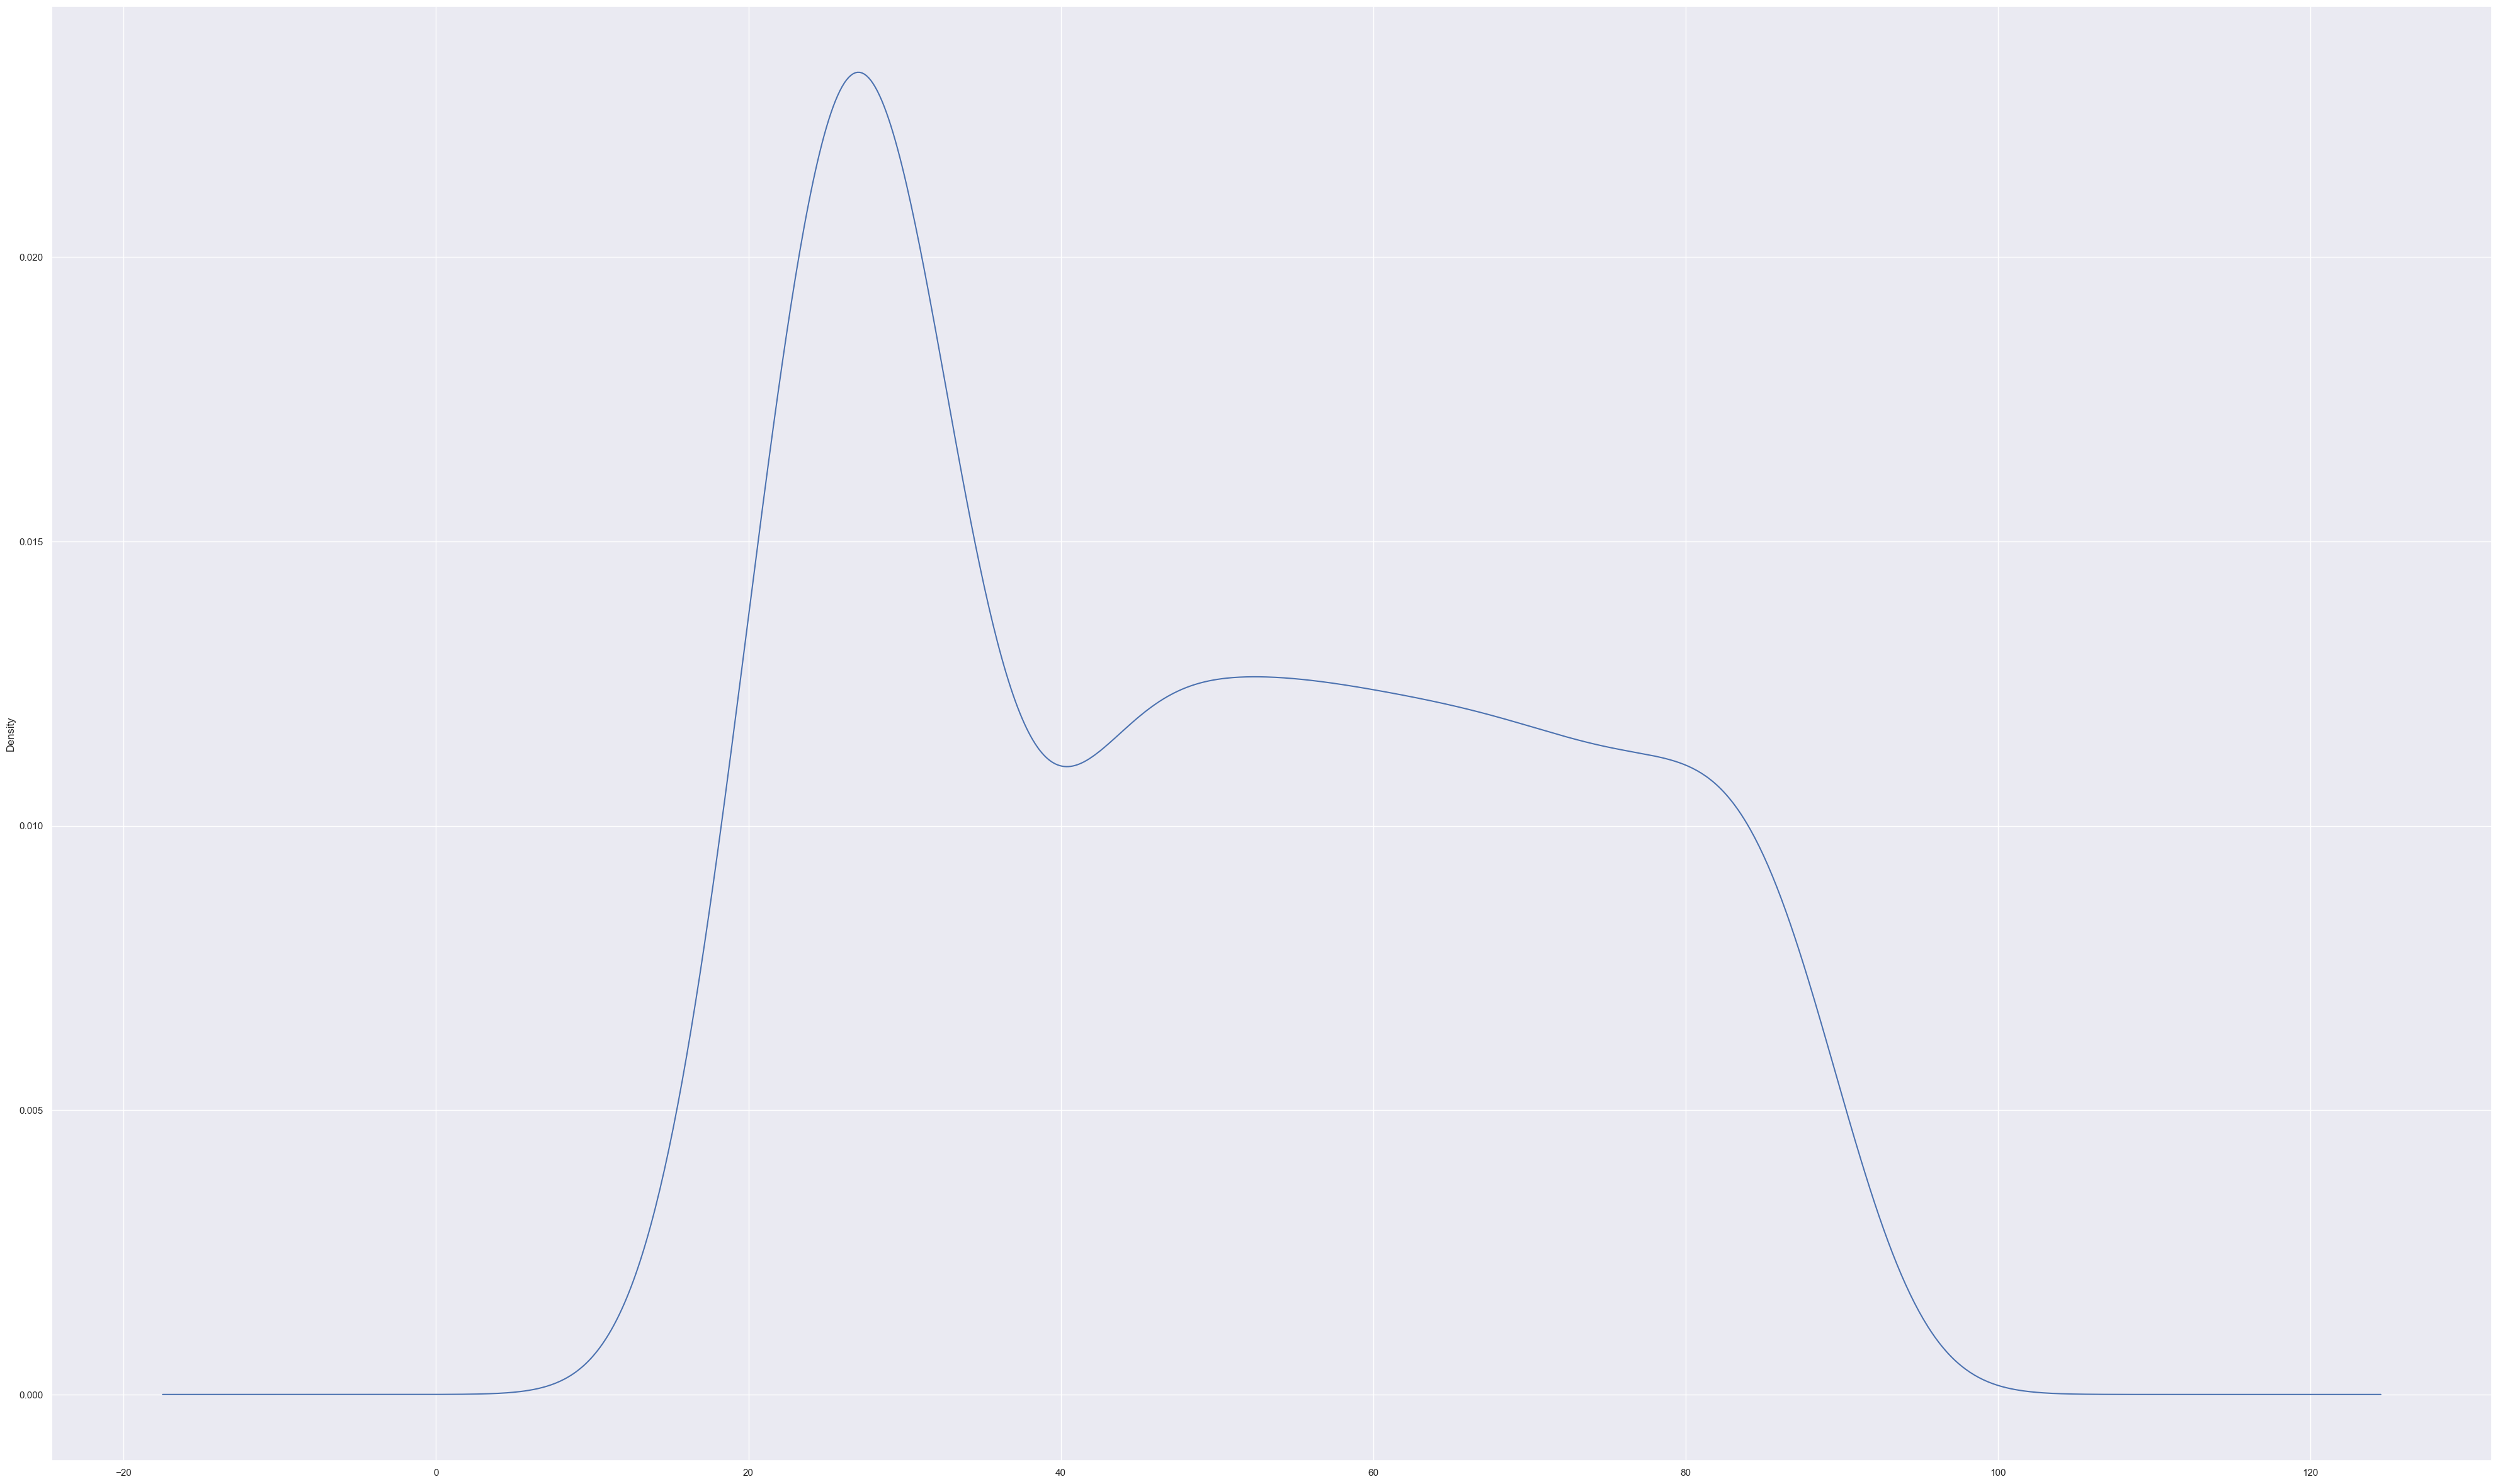

In [17]:
##plot distribution of values in points column
data['Age'].plot(kind='kde')

In [18]:
#data['Gender'].plot(kind='kde')

In [19]:
#plot distribution of values in points column using histogram
#data['Age'].plot(kind='hist', edgecolor='black')

In [20]:
#data['Gender'].plot(kind='hist', edgecolor='black')

In [21]:
#feature selection
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = pd.read_csv("survey_encoded.csv")
print(df.shape)
array = df.values

X = array[:,0:df.shape[1]-1]
Y = array[:,df.shape[1]-1]

df.head()

(1767, 41)


,Age,Height,Weight,Gender,Educational Level,Economic Status,Dependant,Is_Employed,Is_Medically_Insured,Visit_Gym,...,Hospitalized in a year,Regular physician consultation,Negative lifestyle,Skipping Diet,Food-type,WFH due to COVID-19,Sedentary lifestyle due to COVID-19,Unhealthy food habit due to COVID-19,Addiction due to COVID,Depression
0,50,129.54,75.0,1,2,5,4,2,1,0,...,1,0,1,2,1,2,1,0,0,0
1,26,180.34,69.0,1,5,5,1,10,0,1,...,0,0,1,1,1,2,1,0,0,1
2,26,170.18,70.0,1,1,0,2,2,1,0,...,0,0,1,2,0,2,0,0,0,0
3,24,182.88,85.0,1,5,0,1,5,0,0,...,0,0,1,2,0,1,1,1,0,1
4,38,187.96,93.0,1,2,0,3,2,1,0,...,0,1,0,1,0,1,0,0,0,0


In [22]:
test = SelectKBest(score_func=chi2, k = 40)
fit = test.fit(X,Y)

set_printoptions(precision=2)
print(fit.scores_)
featured_data = fit.transform(X)
print ("\nFeatured data:\n", featured_data[0:40])

[4.92e+01 1.16e+01 2.37e+01 6.40e+00 4.78e+00 8.14e-02 4.18e+00 1.11e+01
 2.86e+00 2.03e+00 8.42e+00 4.98e+01 1.76e-01 1.68e-02 3.22e+00 1.91e-01
 1.94e+00 1.94e+00 2.82e+00 1.34e+00 1.10e-04 1.95e+01 1.85e+01 2.23e+00
 2.45e-01 1.21e-02 1.46e-01 7.78e-01 1.48e+00 5.56e-01 2.44e+01 2.77e+00
 9.96e-02 8.93e+00 2.90e+00 1.80e+00 8.89e+00 7.03e-01 2.95e-01 1.84e+01]

Featured data:
 [[ 50.   129.54  75.   ...   1.     0.     0.  ]
 [ 26.   180.34  69.   ...   1.     0.     0.  ]
 [ 26.   170.18  70.   ...   0.     0.     0.  ]
 ...
 [ 28.   165.1   75.   ...   1.     0.     0.  ]
 [ 28.   177.8   85.   ...   0.     0.     0.  ]
 [ 29.   180.34  82.   ...   0.     0.     0.  ]]


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40)
fit = pca.fit(X)
print(fit.explained_variance_ratio_)
print(fit.components_)

[6.56e-01 1.94e-01 9.73e-02 2.49e-02 7.69e-03 2.77e-03 2.42e-03 2.24e-03
 1.35e-03 1.31e-03 1.13e-03 9.25e-04 7.05e-04 6.08e-04 5.67e-04 5.31e-04
 4.92e-04 4.37e-04 4.19e-04 3.73e-04 3.28e-04 2.93e-04 2.84e-04 2.79e-04
 2.23e-04 2.18e-04 2.08e-04 1.92e-04 1.89e-04 1.58e-04 1.49e-04 1.43e-04
 1.34e-04 1.15e-04 1.05e-04 9.19e-05 7.98e-05 5.56e-05 2.80e-05 1.04e-05]
[[-8.65e-01  2.51e-01  4.19e-01 ...  2.62e-04  3.68e-04  2.47e-04]
 [-4.73e-01 -5.74e-01 -6.59e-01 ...  4.27e-03 -8.09e-04  7.92e-04]
 [ 1.42e-01  5.85e-03  5.76e-02 ...  4.23e-04  2.63e-04  3.51e-04]
 ...
 [ 1.83e-03  9.51e-04  1.27e-03 ... -1.87e-02  7.99e-03  5.11e-02]
 [ 5.98e-04 -5.06e-04  1.32e-03 ...  2.93e-02 -6.74e-02 -2.08e-02]
 [-4.83e-04  2.04e-03 -1.12e-03 ... -2.14e-03 -3.11e-02  9.96e-01]]


In [24]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

df.columns

[0.05 0.04 0.05 0.02 0.03 0.03 0.03 0.03 0.01 0.02 0.02 0.02 0.02 0.01
 0.03 0.03 0.03 0.02 0.02 0.03 0.03 0.   0.01 0.02 0.03 0.02 0.03 0.03
 0.03 0.03 0.04 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.02 0.  ]


Index(['Age', 'Height', 'Weight', 'Gender', 'Educational Level',
       'Economic Status', 'Dependant', 'Is_Employed', 'Is_Medically_Insured',
       'Visit_Gym', 'Duration of daily exercise', 'Duration of daily walking',
       'Smoking Habit', 'Habit of Snus', 'Habit of Paan-Masala',
       'Habit of Alcohol', 'The habit of Energy Drinks or Sweet Beverages',
       'Mobile Application for Activity Tracking',
       'Mobile Application for Diet Tracking', 'Social Participation Type',
       'Social Participation duration', 'The habit of Vegetables',
       'Habit of Fruits', 'Habit of Junk Fried Foods', 'Habit of Sweets',
       'Habit of Red Meat', 'Habit of Taking BBQ',
       'Habit of Taking discritionary foods', 'Week_Days_sleep_time_avg',
       'Weekends_sleep_time_avg', 'Existing health problems',
       'Hospitalized in a year', 'Regular physician consultation',
       'Negative lifestyle', 'Skipping Diet', 'Food-type',
       'WFH due to COVID-19', 'Sedentary lifestyle due t

In [25]:
def convert_status_to_description(df):
    if df['Age'] >= 18 and df['Age'] <=40:
        return '0'
    elif df['Age'] >= 40 and df['Age'] <=64:
        return '1'
    elif df['Age'] >= 65:
        return '2'

In [26]:
df['Age_group'] = df.apply(convert_status_to_description, axis=1)

In [27]:
def calulate_bmi(df):
    return (df['Weight'] * df['Weight'])/df['Height']

In [28]:
df['BMI'] = df.apply(calulate_bmi, axis=1)

In [29]:
def calculate_body_composition(df):
    if df['BMI'] < 18.5:
        return 0
    elif df['BMI'] >= 18.5 and df["BMI"] < 25:
        return 1
    elif df['BMI'] >= 25 and df['BMI'] < 30:
        return 2
    elif df['BMI'] >= 30:
        return 3

In [30]:
df['Body_Composition'] = df.apply(calculate_body_composition, axis=1)
df['Educational_Level'] = df['Educational Level']
df['Economic_Status'] = df['Economic Status']
df['Duration_of_daily_exercise'] = df['Duration of daily exercise']
df['Duration_of_daily_walking'] = df['Duration of daily walking']
df['Smoking_Habit'] = df['Smoking Habit']
df['Habit_of_Snus'] = df['Habit of Snus']
df['Habit_of_Paan_Masala'] = df['Habit of Paan-Masala']
df['Habit_of_Alcohol'] = df['Habit of Alcohol']
df['Habit_of_Energy_Drinks'] = df['The habit of Energy Drinks or Sweet Beverages']
df['Mobile_Application_for_Activity_Tracking'] = df['Mobile Application for Activity Tracking']
df['Mobile_Application_for_Diet_Tracking'] = df['Mobile Application for Diet Tracking']
df['Social_Participation_Type'] = df['Social Participation Type']
df['Social_Participation_Duration'] = df['Social Participation duration']
df['Consumption_of_Vegetables'] = df['The habit of Vegetables']
df['Consumption_of_Fruits'] = df['Habit of Fruits']
df['Consumption_of_Junk_Fried_Foods'] = df['Habit of Junk Fried Foods']
df['Consumption_of_Sweets'] = df['Habit of Sweets']
df['Consumption_of_Red_Meat'] = df['Habit of Red Meat']
df['Consumption_of_BBQ_Foods'] = df['Habit of Taking BBQ']
df['Consumption_of_Discritionary_Foods'] = df['Habit of Taking discritionary foods']
df['Existing_Health_Problems'] = df['Existing health problems']
df['Hospitalization_History'] = df['Hospitalized in a year']
df['Regular_Physician_Consultation'] = df['Regular physician consultation']
df['Negative_Lifestyle'] = df['Negative lifestyle']
df['Skipping_Diet'] = df['Skipping Diet']
df['Food_Type'] = df['Food-type']
df['WFH_for_COVID'] = df['WFH due to COVID-19']
df['Sedentary_Lifestyle_due_to_COVID'] = df['Sedentary lifestyle due to COVID-19']
df['Unhealthy_Lifestyle_due_to_COVID'] = df['Unhealthy food habit due to COVID-19']
df['Addiction_due_to_COVID'] = df['Addiction due to COVID']

df['Depressive_State'] = df['Depression']

In [31]:
drop_cols_1 = ['Height', 'Weight', 'BMI', 'Depression', 'Educational Level', 'Economic Status', 'Duration of daily exercise', 'Duration of daily walking', 'Smoking Habit', 'Habit of Snus', 'Habit of Paan-Masala', 'Habit of Alcohol', 'The habit of Energy Drinks or Sweet Beverages', 'Mobile Application for Activity Tracking', 'Mobile Application for Diet Tracking', 'Social Participation Type', 'Social Participation duration', 'The habit of Vegetables', 'Habit of Fruits', 'Habit of Junk Fried Foods', 'Habit of Sweets', 'Habit of Red Meat', 'Habit of Taking BBQ', 'Habit of Taking discritionary foods', 'Existing health problems', 'Hospitalized in a year', 'Regular physician consultation', 'Negative lifestyle', 'Skipping Diet', 'Food-type', 'WFH due to COVID-19', 'Sedentary lifestyle due to COVID-19', 'Unhealthy food habit due to COVID-19', 'Addiction due to COVID']
#drop_cols_2 = ['Height', 'Weight', 'BMI', 'Depression', 'The habit of Vegetables', 'Addiction due to COVID']
#drop_cols_3 = ['Height', 'Weight', 'BMI', 'Depression', 'Habit of Snus (Khaini)', 'Habit of Fruits', 'The habit of Vegetables', 'Addiction due to COVID']

In [32]:
df = df.drop(drop_cols_1, axis=1)
df.columns

Index(['Age', 'Gender', 'Dependant', 'Is_Employed', 'Is_Medically_Insured',
       'Visit_Gym', 'Week_Days_sleep_time_avg', 'Weekends_sleep_time_avg',
       'Age_group', 'Body_Composition', 'Educational_Level', 'Economic_Status',
       'Duration_of_daily_exercise', 'Duration_of_daily_walking',
       'Smoking_Habit', 'Habit_of_Snus', 'Habit_of_Paan_Masala',
       'Habit_of_Alcohol', 'Habit_of_Energy_Drinks',
       'Mobile_Application_for_Activity_Tracking',
       'Mobile_Application_for_Diet_Tracking', 'Social_Participation_Type',
       'Social_Participation_Duration', 'Consumption_of_Vegetables',
       'Consumption_of_Fruits', 'Consumption_of_Junk_Fried_Foods',
       'Consumption_of_Sweets', 'Consumption_of_Red_Meat',
       'Consumption_of_BBQ_Foods', 'Consumption_of_Discritionary_Foods',
       'Existing_Health_Problems', 'Hospitalization_History',
       'Regular_Physician_Consultation', 'Negative_Lifestyle', 'Skipping_Diet',
       'Food_Type', 'WFH_for_COVID', 'Sedentary_

In [33]:
df.to_csv('survey_final.csv')

In [34]:
#df = pd.read_csv('survey_final.csv')
df.columns

Index(['Age', 'Gender', 'Dependant', 'Is_Employed', 'Is_Medically_Insured',
       'Visit_Gym', 'Week_Days_sleep_time_avg', 'Weekends_sleep_time_avg',
       'Age_group', 'Body_Composition', 'Educational_Level', 'Economic_Status',
       'Duration_of_daily_exercise', 'Duration_of_daily_walking',
       'Smoking_Habit', 'Habit_of_Snus', 'Habit_of_Paan_Masala',
       'Habit_of_Alcohol', 'Habit_of_Energy_Drinks',
       'Mobile_Application_for_Activity_Tracking',
       'Mobile_Application_for_Diet_Tracking', 'Social_Participation_Type',
       'Social_Participation_Duration', 'Consumption_of_Vegetables',
       'Consumption_of_Fruits', 'Consumption_of_Junk_Fried_Foods',
       'Consumption_of_Sweets', 'Consumption_of_Red_Meat',
       'Consumption_of_BBQ_Foods', 'Consumption_of_Discritionary_Foods',
       'Existing_Health_Problems', 'Hospitalization_History',
       'Regular_Physician_Consultation', 'Negative_Lifestyle', 'Skipping_Diet',
       'Food_Type', 'WFH_for_COVID', 'Sedentary_

In [35]:
#https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Depressive_State ~ Age', data=df).fit()
sm.stats.anova_lm(model, typ=2)
#if p < 0.05, this means that the categorical variable has significant influence on the numerical variable
#if p > 0.05, this means that the categorical variable has no significant influence on the numerical variable

,sum_sq,df,F,PR(>F)
Age,1.279924,1.0,5.366,0.020647
Residual,420.996250,1765.0,NaN,NaN


In [36]:
model = ols('Depressive_State ~ Gender', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Gender,4.027499,1.0,16.995954,0.000039
Residual,418.248676,1765.0,NaN,NaN


In [37]:
model = ols('Depressive_State ~ Dependant', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Dependant,1.778279,1.0,7.464157,0.006357
Residual,420.497895,1765.0,NaN,NaN


In [38]:
model = ols('Depressive_State ~ Is_Employed', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Is_Employed,1.452201,1.0,6.090753,0.013683
Residual,420.823973,1765.0,NaN,NaN


In [39]:
model = ols('Depressive_State ~ Is_Employed', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Is_Employed,1.452201,1.0,6.090753,0.013683
Residual,420.823973,1765.0,NaN,NaN


In [40]:
model = ols('Depressive_State ~ Is_Medically_Insured', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Is_Medically_Insured,4.061710,1.0,17.141727,0.000036
Residual,418.214464,1765.0,NaN,NaN


In [41]:
model = ols('Depressive_State ~ Visit_Gym', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Visit_Gym,0.608495,1.0,2.547014,0.110682
Residual,421.667679,1765.0,NaN,NaN


In [42]:
model = ols('Depressive_State ~ Week_Days_sleep_time_avg', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Week_Days_sleep_time_avg,2.288939,1.0,9.619288,0.001956
Residual,419.987235,1765.0,NaN,NaN


In [43]:
model = ols('Depressive_State ~ Age_group', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Age_group,1.160575,2.0,2.430751,0.088265
Residual,421.115599,1764.0,NaN,NaN


In [44]:
model = ols('Depressive_State ~ Body_Composition', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Body_Composition,2.009624,1.0,8.43985,0.003717
Residual,420.266550,1765.0,NaN,NaN


In [45]:
model = ols('Depressive_State ~ Educational_Level', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Educational_Level,1.601077,1.0,6.71754,0.009626
Residual,420.675097,1765.0,NaN,NaN


In [46]:
model = ols('Depressive_State ~ Economic_Status', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Economic_Status,0.015237,1.0,0.063689,0.800787
Residual,422.260937,1765.0,NaN,NaN


In [47]:
model = ols('Depressive_State ~ Duration_of_daily_exercise', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Duration_of_daily_exercise,5.103646,1.0,21.59283,0.000004
Residual,417.172528,1765.0,NaN,NaN


In [48]:
model = ols('Depressive_State ~ Duration_of_daily_walking', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Duration_of_daily_walking,5.526092,1.0,23.403841,0.000001
Residual,416.750082,1765.0,NaN,NaN


In [49]:
model = ols('Depressive_State ~ Smoking_Habit', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Smoking_Habit,0.187286,1.0,0.78315,0.3763
Residual,422.088889,1765.0,NaN,NaN


In [50]:
model = ols('Depressive_State ~ Habit_of_Snus', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Habit_of_Snus,0.004118,1.0,0.017214,0.895631
Residual,422.272056,1765.0,NaN,NaN


In [51]:
model = ols('Depressive_State ~ Habit_of_Alcohol', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Habit_of_Alcohol,0.200032,1.0,0.836474,0.360532
Residual,422.076143,1765.0,NaN,NaN


In [52]:
model = ols('Depressive_State ~ Habit_of_Energy_Drinks', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Habit_of_Energy_Drinks,1.423397,1.0,5.969536,0.014653
Residual,420.852777,1765.0,NaN,NaN


In [53]:
model = ols('Depressive_State ~ Habit_of_Paan_Masala', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Habit_of_Paan_Masala,2.198431,1.0,9.236936,0.002407
Residual,420.077743,1765.0,NaN,NaN


In [54]:
model = ols('Depressive_State ~ Mobile_Application_for_Activity_Tracking', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Mobile_Application_for_Activity_Tracking,0.670658,1.0,2.807629,0.093994
Residual,421.605516,1765.0,NaN,NaN


In [55]:
model = ols('Depressive_State ~ Mobile_Application_for_Diet_Tracking', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Mobile_Application_for_Diet_Tracking,0.979346,1.0,4.102917,0.04296
Residual,421.296828,1765.0,NaN,NaN


In [56]:
model = ols('Depressive_State ~ Social_Participation_Type', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Social_Participation_Type,0.544425,1.0,2.278485,0.131359
Residual,421.731750,1765.0,NaN,NaN


In [57]:
model = ols('Depressive_State ~ Social_Participation_Duration', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Social_Participation_Duration,0.000048,1.0,0.000199,0.988741
Residual,422.276127,1765.0,NaN,NaN


In [58]:
model = ols('Depressive_State ~ Consumption_of_Vegetables', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Consumption_of_Vegetables,2.407536,1.0,10.120549,0.001492
Residual,419.868638,1765.0,NaN,NaN


In [59]:
model = ols('Depressive_State ~ Consumption_of_Fruits', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Consumption_of_Fruits,2.387193,1.0,10.034545,0.001563
Residual,419.888982,1765.0,NaN,NaN


In [60]:
model = ols('Depressive_State ~ Consumption_of_Junk_Fried_Foods', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Consumption_of_Junk_Fried_Foods,2.599590,1.0,10.932887,0.000964
Residual,419.676584,1765.0,NaN,NaN


In [61]:
model = ols('Depressive_State ~ Consumption_of_Sweets', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Consumption_of_Sweets,0.211058,1.0,0.882607,0.347617
Residual,422.065116,1765.0,NaN,NaN


In [62]:
model = ols('Depressive_State ~ Consumption_of_Red_Meat', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Consumption_of_Red_Meat,0.031099,1.0,0.129994,0.718481
Residual,422.245076,1765.0,NaN,NaN


In [63]:
model = ols('Depressive_State ~ Consumption_of_BBQ_Foods', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Consumption_of_BBQ_Foods,0.202883,1.0,0.848403,0.35713
Residual,422.073291,1765.0,NaN,NaN


In [64]:
model = ols('Depressive_State ~ Consumption_of_Discritionary_Foods', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Consumption_of_Discritionary_Foods,0.318846,1.0,1.333697,0.248305
Residual,421.957328,1765.0,NaN,NaN


In [65]:
model = ols('Depressive_State ~ Existing_Health_Problems', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Existing_Health_Problems,0.778781,1.0,3.261108,0.071111
Residual,421.497393,1765.0,NaN,NaN


In [66]:
model = ols('Depressive_State ~ Hospitalization_History', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Hospitalization_History,0.848410,1.0,3.553265,0.059593
Residual,421.427764,1765.0,NaN,NaN


In [67]:
model = ols('Depressive_State ~ Regular_Physician_Consultation', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Regular_Physician_Consultation,0.039574,1.0,0.165426,0.684259
Residual,422.236600,1765.0,NaN,NaN


In [68]:
model = ols('Depressive_State ~ Negative_Lifestyle', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Negative_Lifestyle,2.552361,1.0,10.733052,0.001073
Residual,419.723813,1765.0,NaN,NaN


In [69]:
model = ols('Depressive_State ~ Skipping_Diet', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Skipping_Diet,4.038547,1.0,17.043026,0.000038
Residual,418.237628,1765.0,NaN,NaN


In [70]:
model = ols('Depressive_State ~ Food_Type', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Food_Type,0.577186,1.0,2.415784,0.120297
Residual,421.698988,1765.0,NaN,NaN


In [71]:
model = ols('Depressive_State ~ WFH_for_COVID', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
WFH_for_COVID,2.267606,1.0,9.52915,0.002054
Residual,420.008568,1765.0,NaN,NaN


In [72]:
model = ols('Depressive_State ~ Sedentary_Lifestyle_due_to_COVID', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Sedentary_Lifestyle_due_to_COVID,0.251136,1.0,1.050307,0.305577
Residual,422.025038,1765.0,NaN,NaN


In [73]:
model = ols('Depressive_State ~ Unhealthy_Lifestyle_due_to_COVID', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Unhealthy_Lifestyle_due_to_COVID,0.083659,1.0,0.34974,0.554336
Residual,422.192516,1765.0,NaN,NaN


In [74]:
model = ols('Depressive_State ~ Addiction_due_to_COVID', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Addiction_due_to_COVID,4.435503,1.0,18.736002,0.000016
Residual,417.840671,1765.0,NaN,NaN


Depressive_State    0    1
Gender                    
0                 365  306
1                 704  392
Gender              0    1
Depressive_State          
0                 365  704
1                 306  392


<AxesSubplot: xlabel='Depressive_State'>

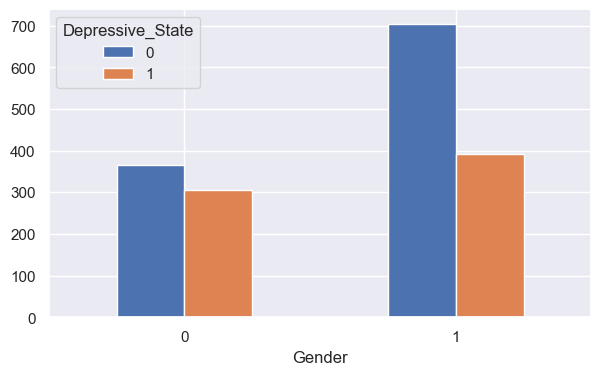

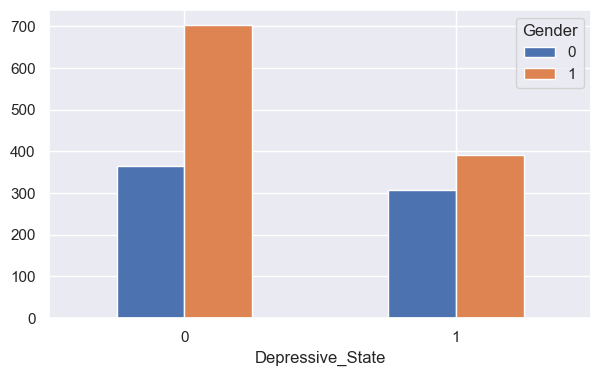

In [75]:
CrosstabResult=pd.crosstab(index=df['Gender'],columns=df['Depressive_State'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Gender'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Dependant           1    2    3    4   5
Depressive_State                        
0                 411  345  176  131   6
1                 251  201  128  101  17


<AxesSubplot: xlabel='Depressive_State'>

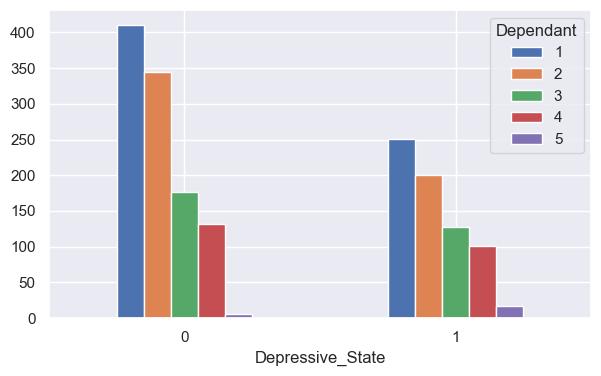

In [76]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Dependant'])
print(CrosstabResult)

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Is_Employed        0   1    2   3    4   5   6    7   8   9   10
Depressive_State                                                
0                 124   0  363   0  183  28   4  277  75   2  13
1                  74   1  217   2  112  20   2  167  77   2  24


<AxesSubplot: xlabel='Depressive_State'>

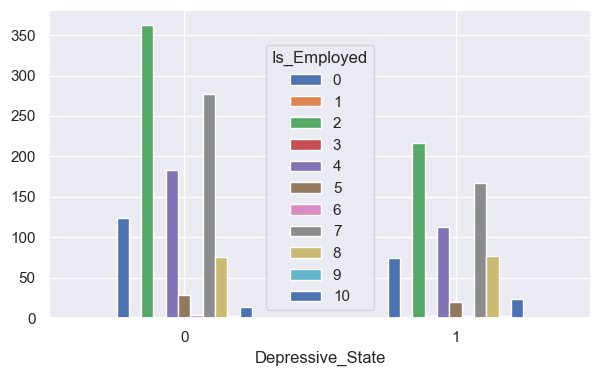

In [77]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Is_Employed'])
print(CrosstabResult)

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Is_Medically_Insured    0    1
Depressive_State              
0                     148  921
1                     149  549


<AxesSubplot: xlabel='Depressive_State'>

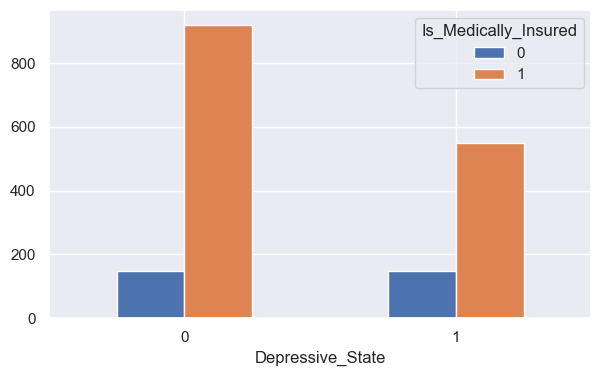

In [78]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Is_Medically_Insured'])
print(CrosstabResult)

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Visit_Gym           0    1
Depressive_State          
0                 838  231
1                 569  129


<AxesSubplot: xlabel='Depressive_State'>

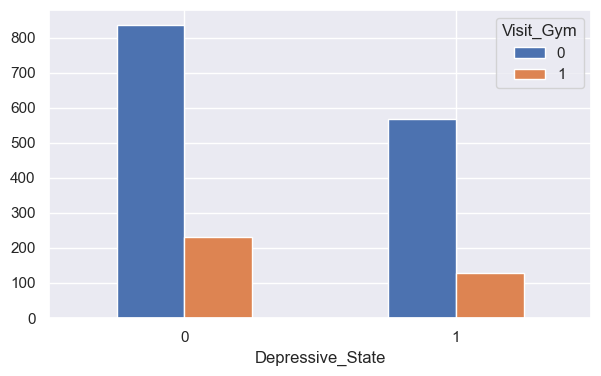

In [79]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Visit_Gym'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Age_group           0    1    2
Depressive_State               
0                 416  337  316
1                 308  197  193


<AxesSubplot: xlabel='Depressive_State'>

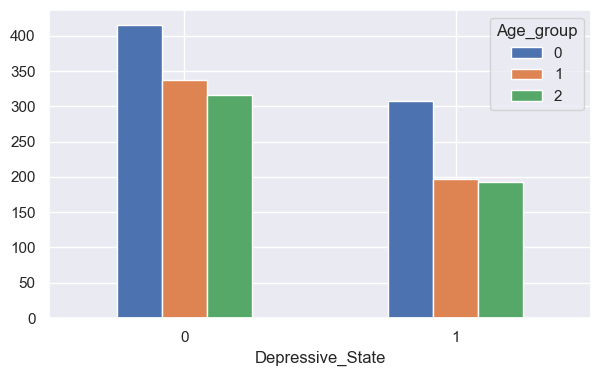

In [80]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Age_group'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Body_Composition    0    1    2    3
Depressive_State                    
0                 103  344  198  424
1                 105  215  140  238


<AxesSubplot: xlabel='Depressive_State'>

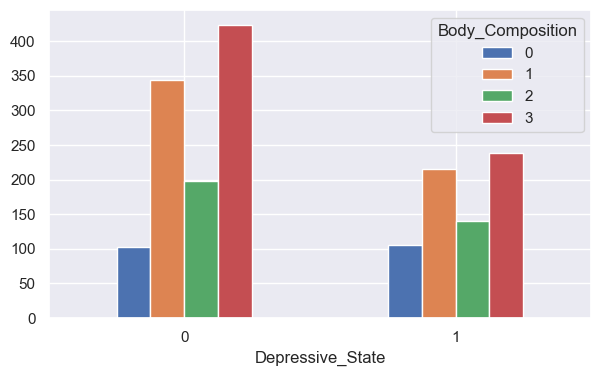

In [81]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Body_Composition'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Educational_Level   0   1    2  3    4    5
Depressive_State                           
0                  30  18  539  0  171  311
1                  29  29  358  2  103  177


<AxesSubplot: xlabel='Depressive_State'>

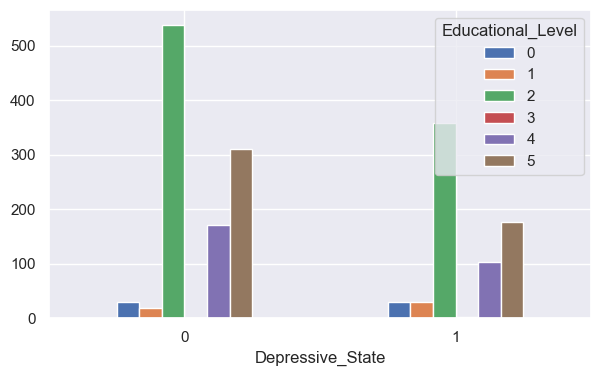

In [82]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Educational_Level'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Economic_Status     0    1  2   3   4   5
Depressive_State                         
0                 128  750  0  84  11  96
1                  81  498  1  36  10  72


<AxesSubplot: xlabel='Depressive_State'>

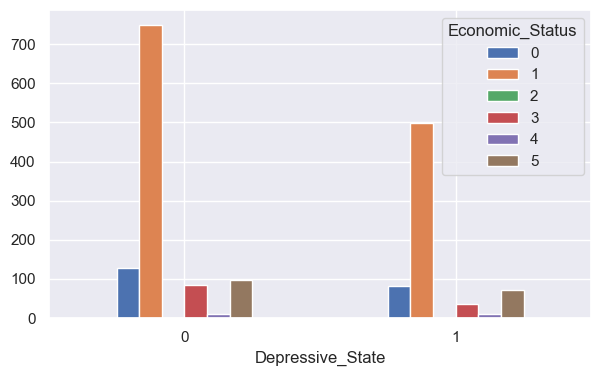

In [83]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Economic_Status'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Duration_of_daily_exercise    0    1    2    3  4
Depressive_State                                 
0                           150  118  734   67  0
1                            94   39  438  126  1


<AxesSubplot: xlabel='Depressive_State'>

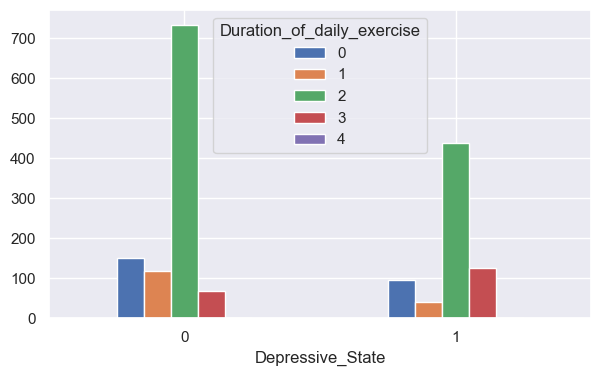

In [84]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Duration_of_daily_exercise'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Duration_of_daily_walking    0    1  2   3   4
Depressive_State                              
0                          879  130  6  43  11
1                          546   52  7  85   8


<AxesSubplot: xlabel='Depressive_State'>

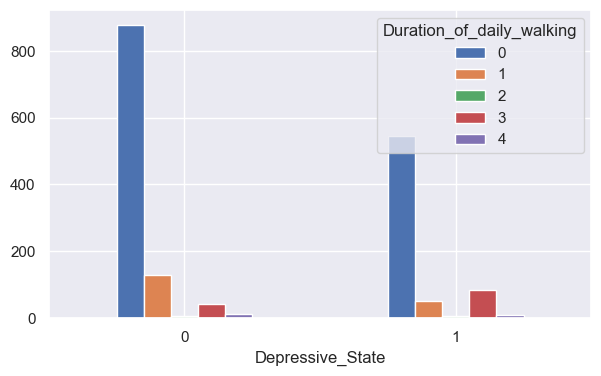

In [85]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Duration_of_daily_walking'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Smoking_Habit      0    1    2
Depressive_State              
0                 89  802  178
1                 54  517  127


<AxesSubplot: xlabel='Depressive_State'>

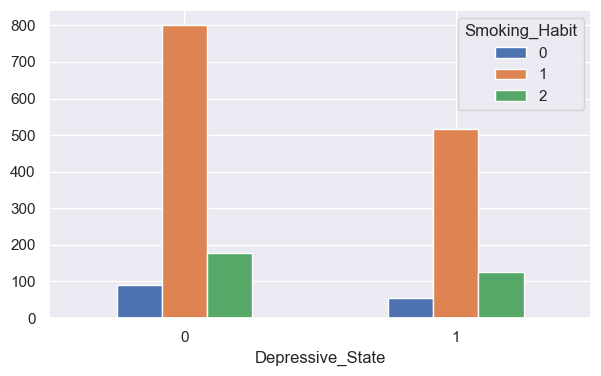

In [86]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Smoking_Habit'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Habit_of_Snus        0   1
Depressive_State          
0                 1041  28
1                  679  19


<AxesSubplot: xlabel='Depressive_State'>

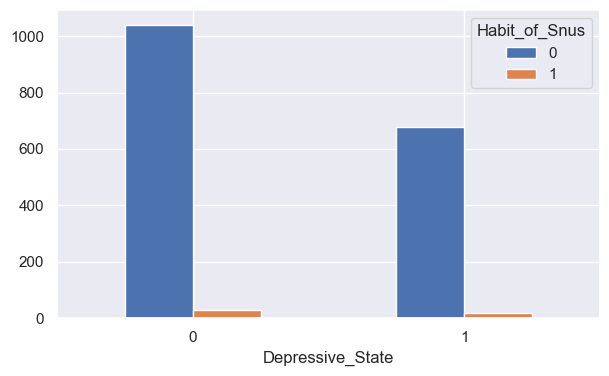

In [87]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Habit_of_Snus'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Habit_of_Paan_Masala    0    1    2
Depressive_State                   
0                     157  183  729
1                      84  231  383


<AxesSubplot: xlabel='Depressive_State'>

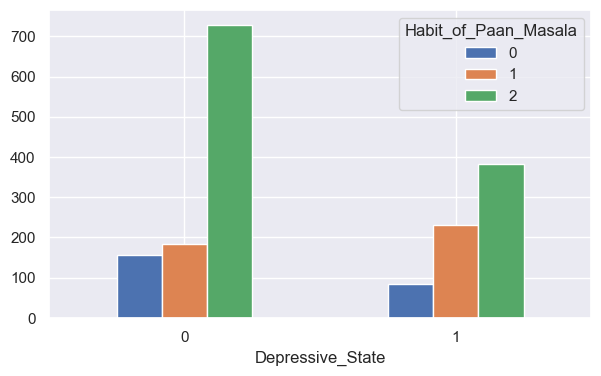

In [88]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Habit_of_Paan_Masala'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Habit_of_Alcohol   0    1    2
Depressive_State              
0                 45  639  385
1                 31  431  236


<AxesSubplot: xlabel='Depressive_State'>

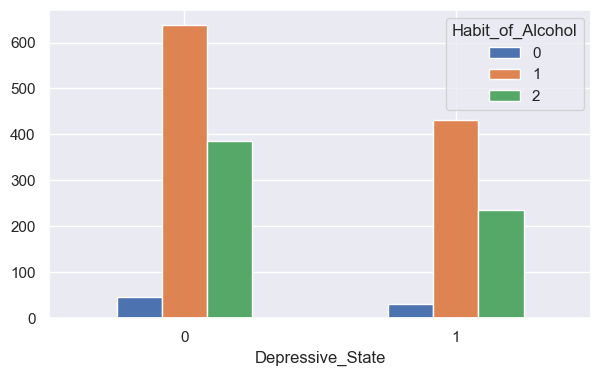

In [89]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Habit_of_Alcohol'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Habit_of_Energy_Drinks    0    1    2
Depressive_State                     
0                       145  232  692
1                        81  120  497


<AxesSubplot: xlabel='Depressive_State'>

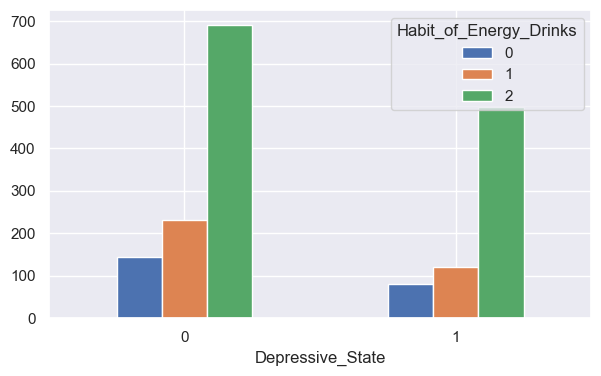

In [90]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Habit_of_Energy_Drinks'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Mobile_Application_for_Activity_Tracking    0    1
Depressive_State                                  
0                                         724  345
1                                         499  199


<AxesSubplot: xlabel='Depressive_State'>

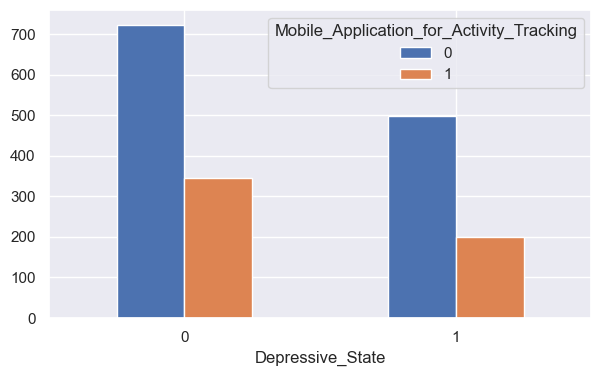

In [91]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Mobile_Application_for_Activity_Tracking'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Mobile_Application_for_Diet_Tracking    0    1
Depressive_State                              
0                                     717  352
1                                     500  198


<AxesSubplot: xlabel='Depressive_State'>

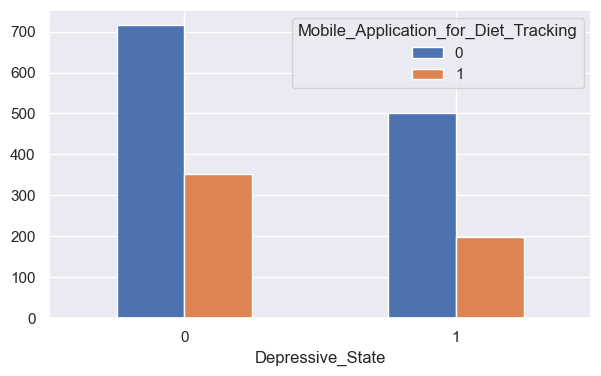

In [92]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Mobile_Application_for_Diet_Tracking'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Social_Participation_Type    0    1   2
Depressive_State                       
0                          456  522  91
1                          273  358  67


<AxesSubplot: xlabel='Depressive_State'>

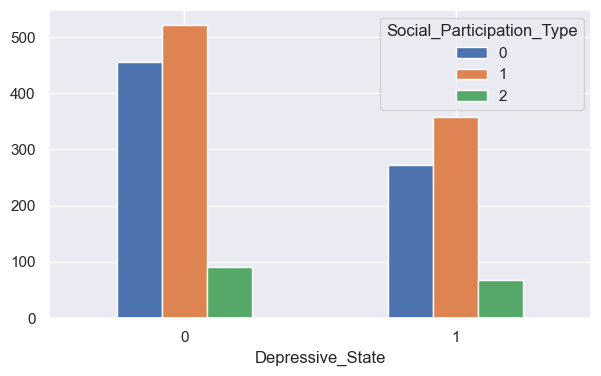

In [93]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Social_Participation_Type'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Social_Participation_Duration    0    1
Depressive_State                       
0                              590  479
1                              385  313


<AxesSubplot: xlabel='Depressive_State'>

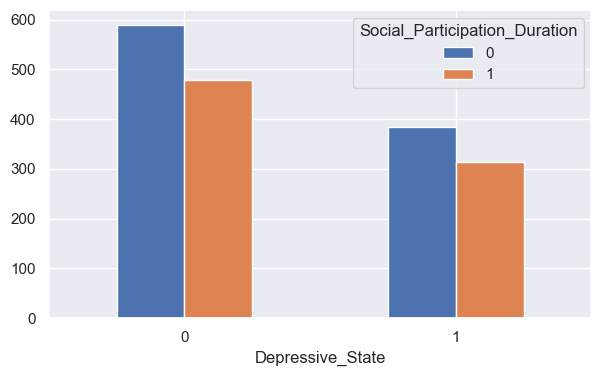

In [94]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Social_Participation_Duration'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Consumption_of_Vegetables     0  1   2
Depressive_State                      
0                          1061  1   7
1                           680  1  17


<AxesSubplot: xlabel='Depressive_State'>

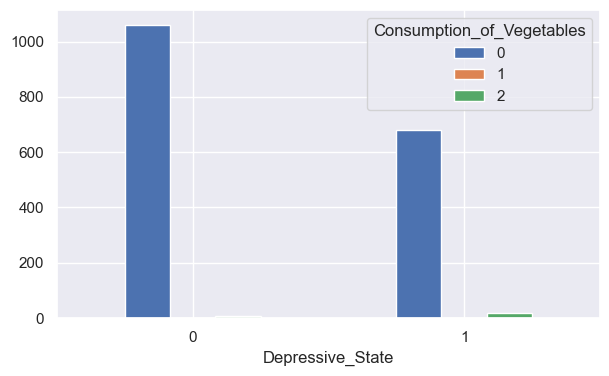

In [95]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Consumption_of_Vegetables'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Consumption_of_Fruits     0  1   2
Depressive_State                  
0                      1013  1  55
1                       634  2  62


<AxesSubplot: xlabel='Depressive_State'>

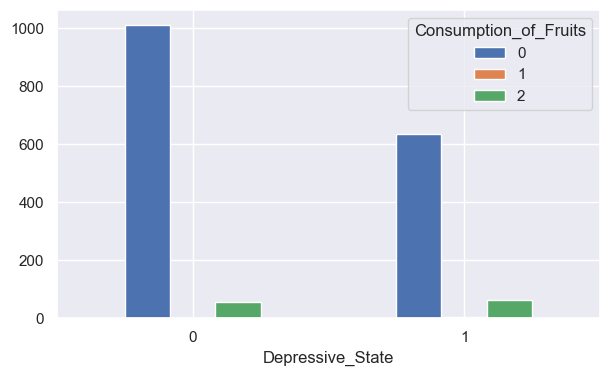

In [96]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Consumption_of_Fruits'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Consumption_of_Junk_Fried_Foods   0   1    2
Depressive_State                            
0                                71  86  912
1                                80  56  562


<AxesSubplot: xlabel='Depressive_State'>

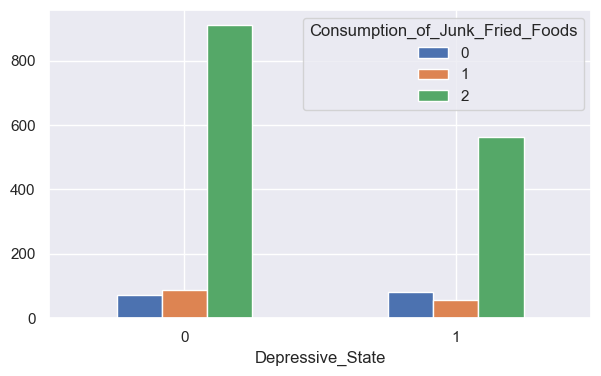

In [97]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Consumption_of_Junk_Fried_Foods'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Consumption_of_Sweets    0   1    2
Depressive_State                   
0                      128  86  855
1                       84  77  537


<AxesSubplot: xlabel='Depressive_State'>

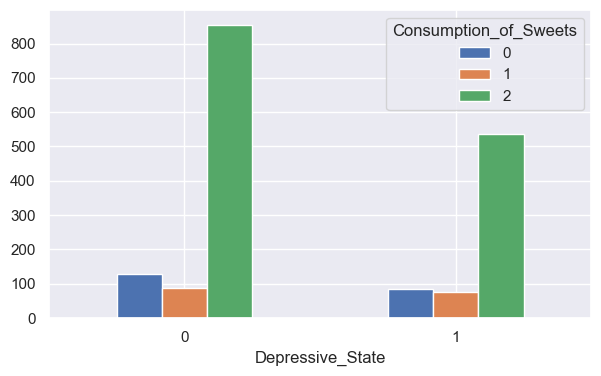

In [98]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Consumption_of_Sweets'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Consumption_of_Red_Meat  0    1    2
Depressive_State                    
0                        0  219  850
1                        2  144  552


<AxesSubplot: xlabel='Depressive_State'>

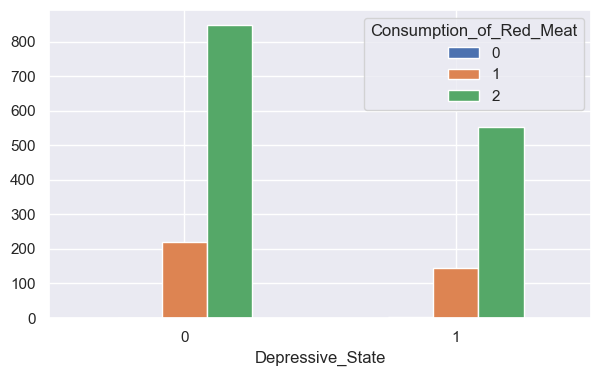

In [99]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Consumption_of_Red_Meat'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Consumption_of_BBQ_Foods  0    1    2
Depressive_State                     
0                         1  596  472
1                         0  406  292


<AxesSubplot: xlabel='Depressive_State'>

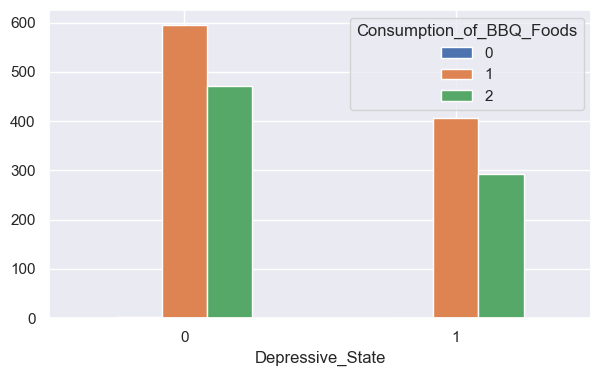

In [100]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Consumption_of_BBQ_Foods'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Consumption_of_Discritionary_Foods    0    1    2
Depressive_State                                 
0                                   306  121  642
1                                   185   74  439


<AxesSubplot: xlabel='Depressive_State'>

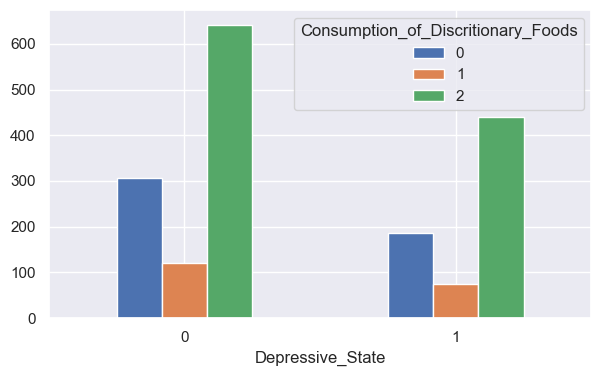

In [101]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Consumption_of_Discritionary_Foods'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Hospitalization_History    0    1
Depressive_State                 
0                        817  252
1                        560  138


<AxesSubplot: xlabel='Depressive_State'>

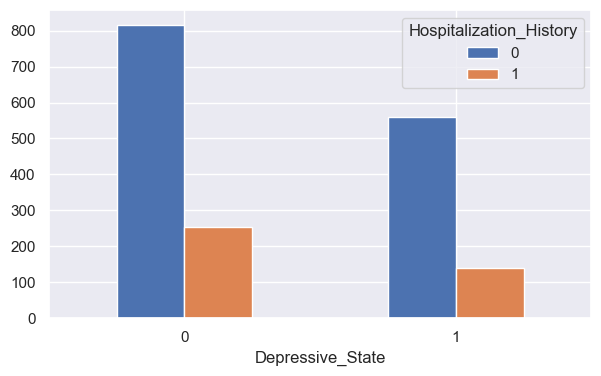

In [102]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Hospitalization_History'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Regular_Physician_Consultation    0    1
Depressive_State                        
0                               639  430
1                               424  274


<AxesSubplot: xlabel='Depressive_State'>

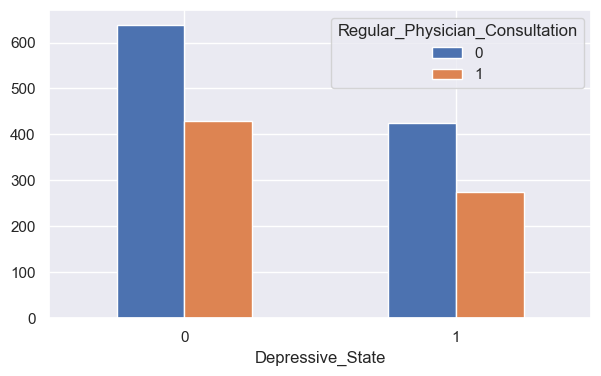

In [103]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Regular_Physician_Consultation'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Negative_Lifestyle    0    1
Depressive_State            
0                   919  150
1                   559  139


<AxesSubplot: xlabel='Depressive_State'>

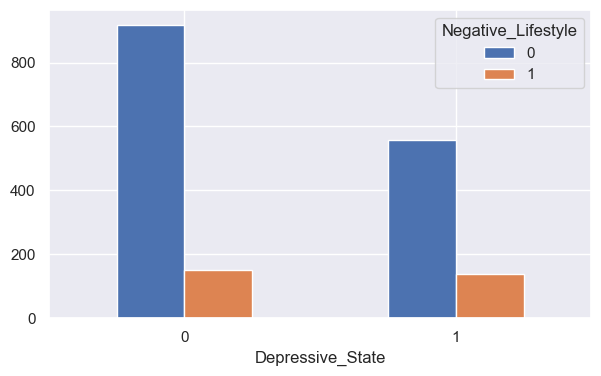

In [104]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Negative_Lifestyle'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Skipping_Diet      0    1    2
Depressive_State              
0                  0  796  273
1                 13  428  257


<AxesSubplot: xlabel='Depressive_State'>

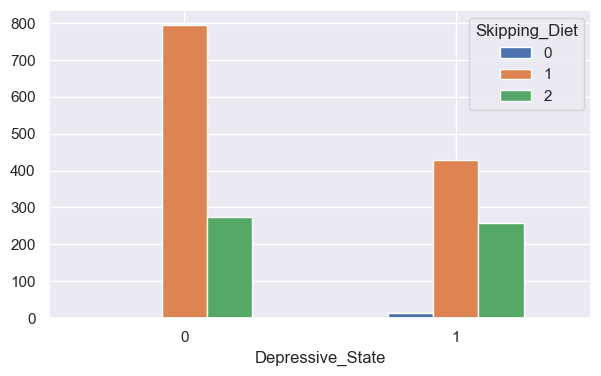

In [105]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Skipping_Diet'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Food_Type           0    1
Depressive_State          
0                 781  288
1                 533  165


<AxesSubplot: xlabel='Depressive_State'>

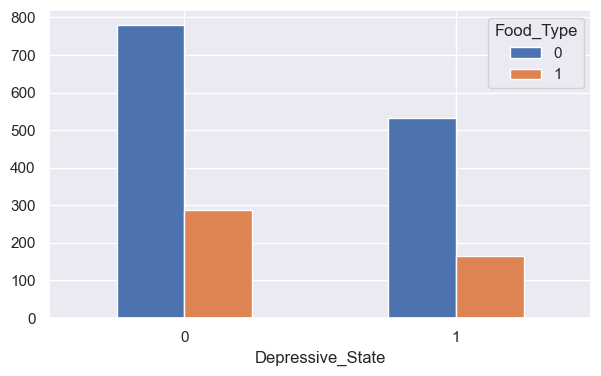

In [106]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Food_Type'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

WFH_for_COVID       0   1    2
Depressive_State              
0                 540  25  504
1                 287  45  366


<AxesSubplot: xlabel='Depressive_State'>

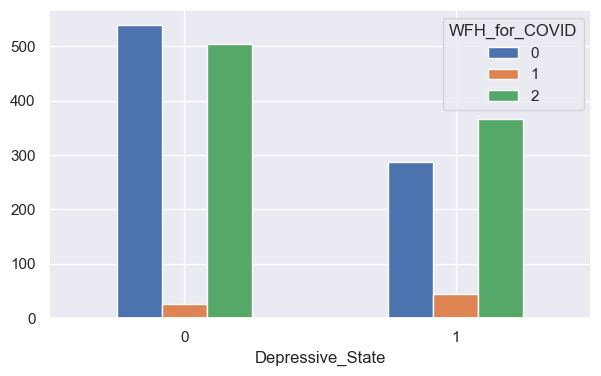

In [107]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['WFH_for_COVID'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Sedentary_Lifestyle_due_to_COVID    0    1
Depressive_State                          
0                                 725  344
1                                 457  241


<AxesSubplot: xlabel='Depressive_State'>

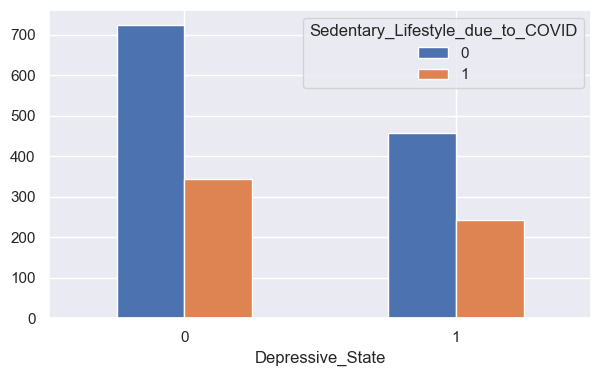

In [108]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Sedentary_Lifestyle_due_to_COVID'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Unhealthy_Lifestyle_due_to_COVID    0    1
Depressive_State                          
0                                 897  172
1                                 593  105


<AxesSubplot: xlabel='Depressive_State'>

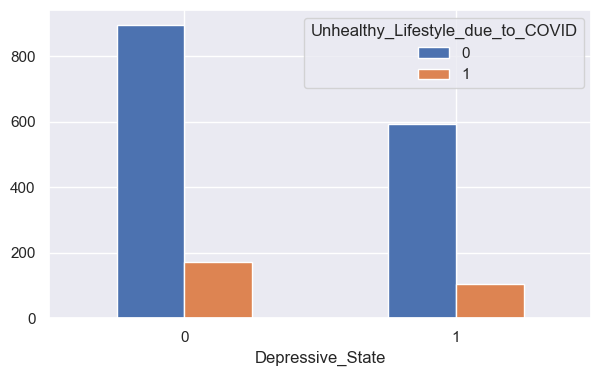

In [109]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Unhealthy_Lifestyle_due_to_COVID'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Addiction_due_to_COVID     0   1
Depressive_State                
0                       1067   2
1                        682  16


<AxesSubplot: xlabel='Depressive_State'>

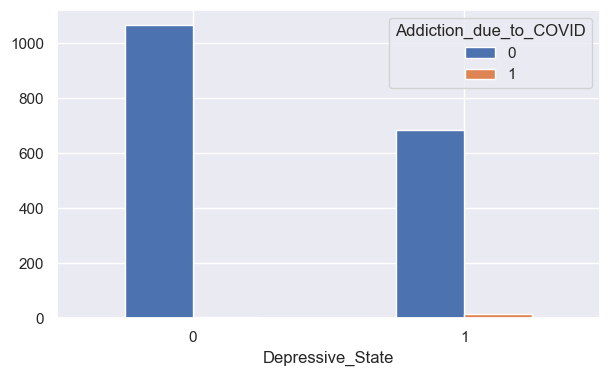

In [110]:
CrosstabResult=pd.crosstab(index=df['Depressive_State'],columns=df['Addiction_due_to_COVID'])
print(CrosstabResult)

# Grouped bar chart between GENDER and Depression
#matplotlib inline # only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(7,4), rot=0)